<a href="https://colab.research.google.com/github/Khhushhiiii/GENERATIVE-AI/blob/main/Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####This application generates images of handwritten digits (0-9) using a trained deep learning model.

Deep Learning model

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Load and preprocess the MNIST dataset
(x_train, _), (_, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Define and compile the generator model
latent_dim = 100

generator = keras.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_dim=latent_dim),
    keras.layers.Reshape((7, 7, 128)),
    keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.LeakyReLU(alpha=0.01),
    keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), padding="same", activation="sigmoid")
])

# Compile the generator model
generator.compile(loss="binary_crossentropy", optimizer="adam")

# Train the generator model
batch_size = 128
epochs = 30

generator.fit(
    np.random.normal(size=(x_train.shape[0], latent_dim)),
    x_train,
    batch_size=batch_size,
    epochs=epochs
)

# Save the generator model
generator.save("generator_model.h5")


Epoch 1/30
469/469 [==============================] - 36s 74ms/step - loss: 0.2890
Epoch 2/30
469/469 [==============================] - 32s 69ms/step - loss: 0.2641
Epoch 3/30
469/469 [==============================] - 31s 67ms/step - loss: 0.2627
Epoch 4/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2618
Epoch 5/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2611
Epoch 6/30
469/469 [==============================] - 31s 67ms/step - loss: 0.2605
Epoch 7/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2599
Epoch 8/30
469/469 [==============================] - 33s 70ms/step - loss: 0.2592
Epoch 9/30
469/469 [==============================] - 31s 67ms/step - loss: 0.2586
Epoch 10/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2580
Epoch 11/30
469/469 [==============================] - 32s 68ms/step - loss: 0.2573
Epoch 12/30
469/469 [==============================] - 31s 67ms/step - loss: 0.2567
E

1/1 [==============================] - 0s 91ms/step


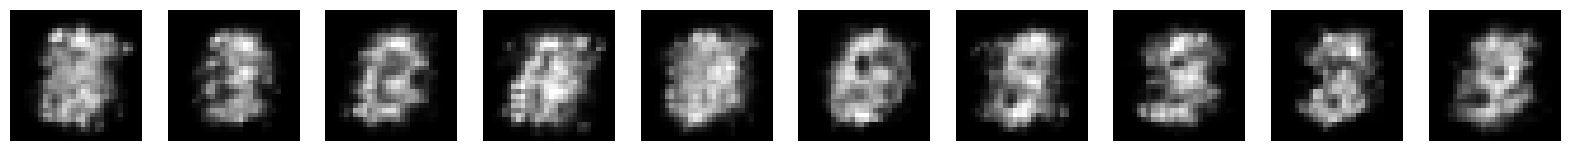

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the trained generator model
generator = keras.models.load_model('/content/generator_model.h5')

# Generate random noise
num_images = 10
latent_dim = 100
random_latent_vectors = np.random.normal(size=(num_images, latent_dim))

# Generate images
generated_images = generator.predict(random_latent_vectors)

# Display the generated images
fig, axs = plt.subplots(1, num_images, figsize=(20, 2))

for i in range(num_images):
    axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
    axs[i].axis('off')

plt.show()


Clearing Blur images

1/1 [==============================] - 0s 68ms/step


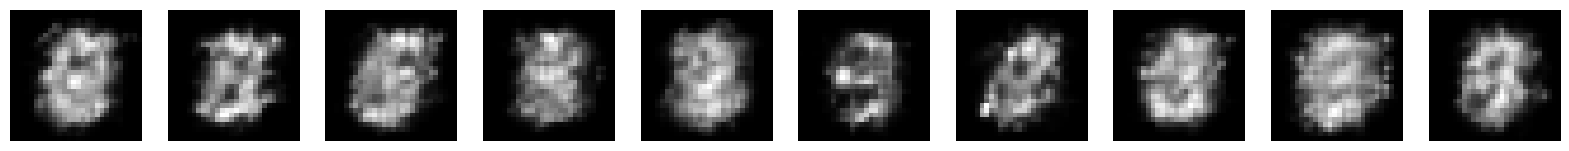

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Load the trained generator model
generator = keras.models.load_model('/content/generator_model.h5')

# Generate random noise
num_images = 10
latent_dim = 100
random_latent_vectors = np.random.normal(size=(num_images, latent_dim))

# Generate images
generated_images = generator.predict(random_latent_vectors)

# Denormalize the generated images
generated_images = (generated_images * 0.5) + 0.5

# Display the generated images
fig, axs = plt.subplots(1, num_images, figsize=(20, 2))

for i in range(num_images):
    axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
    axs[i].axis('off')

plt.show()
